In [1]:
from datapackage import Package

In [2]:
package = Package('https://datahub.io/core/glacier-mass-balance/datapackage.json')

In [3]:
for resource in package.resource_names:
    print(resource)

validation_report
glaciers_csv
glaciers_json
glacier-mass-balance_zip
glaciers


In [4]:
glaciers_resource = package.get_resource('glaciers_csv') 

In [5]:
glaciers_data = glaciers_resource.read()

In [6]:
import pandas as pd
df = pd.DataFrame(glaciers_data)

In [8]:
df.columns = ['year', 'mean_cumulative_mass_balance', 'num_observations']
df.head()

,year,mean_cumulative_mass_balance,num_observations
0,1945,0,None
1,1946,-1.13,1
2,1947,-3.19,1
3,1948,-3.19,1
4,1949,-3.82,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
year                            70 non-null int64
mean_cumulative_mass_balance    70 non-null object
num_observations                69 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [11]:
df['mean_cumulative_mass_balance'] = pd.to_numeric(df['mean_cumulative_mass_balance'])
df['num_observations'] = pd.to_numeric(df['num_observations'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
year                            70 non-null int64
mean_cumulative_mass_balance    70 non-null float64
num_observations                69 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


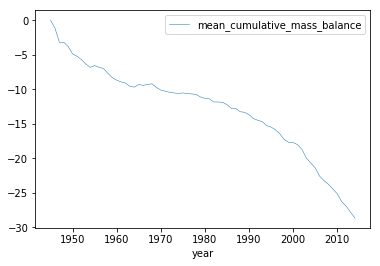

In [18]:
import matplotlib.pyplot as plt
ax = plt.gca()
df.plot(subplots=True, kind='line', x='year', y='mean_cumulative_mass_balance', ax=ax, linewidth=0.5)
# plt.show()
plt.savefig('glacier_mean_cumulative_mass_balance.png', bbox_inches='tight')